# Arnoldi Iteration

In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.linalg
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...25
n = 25
eigvals = np.linspace(1., n, n)
eigvecs = np.random.randn(n, n)
print(eigvals)

A = np.linalg.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))
print(np.linalg.eig(A)[0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
[25. 24. 23.  1.  2.  3. 22.  4. 21. 20.  5.  6.  7. 19. 18.  8.  9. 17.
 16. 10. 11. 12. 15. 14. 13.]


In [3]:
np.diag(eigvecs @ A @ np.linalg.inv(eigvecs))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

# Initialization

In [4]:
Q = np.zeros((n, n))
H = np.zeros((n, n))

k = 0

In [5]:
x0 = np.random.randn(n)
x0 = x0 / np.linalg.norm(x0)

Q[:, k] = x0

del x0

# Algorithm

24


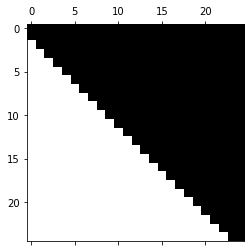

In [32]:
print(k)

u = A @ Q[:, k]

for j in range(k+1):
    qj = Q[:, j]
    H[j, k] = qj @ u
    u = u - H[j,k]*qj
    
if k+1 < n:
    H[k+1, k] = np.linalg.norm(u)
    Q[:,k+1] = u / H[k+1, k]
    
k += 1

plt.spy(H)

In [33]:
np.linalg.norm(Q.T @ Q - np.eye(n))

7.234565184584843e-08

In [34]:
np.linalg.norm(Q.T @ A @ Q - H)

7.038493605756981e-06